In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [22]:
import statsmodels.api as sm

In [55]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [90]:
import sklearn.feature_extraction.text as text

In [111]:
import sklearn.linear_model as linear_model

In [2]:
data = pd.read_csv('dm.csv',na_values=["", " ", "NA", "N/A"])

In [3]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
data['Target'] = data['AmountSpent'].map(lambda x: 1 if x>data['AmountSpent'].mean() else 0)

In [6]:
data.drop('AmountSpent',axis=1,inplace=True)

In [7]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,Target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [10]:
data.shape

(1000, 11)

In [8]:
data['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [9]:
data['History'].isnull().sum()

303

In [11]:
data['History'] = data['History'].fillna('NewCust')

In [12]:
data['History'].value_counts()

NewCust    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [13]:
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'Cust_Id', 'Target'],
      dtype='object')

In [14]:
data = pd.get_dummies(data, columns=['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History'],prefix='class')

In [15]:
data.head()

,Salary,Children,Catalogs,Cust_Id,Target,class_Middle,class_Old,class_Young,class_Female,class_Male,class_Own,class_Rent,class_Married,class_Single,class_Close,class_Far,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,247,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,127,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,479,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,475,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,151,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [16]:
data.columns

Index(['Salary', 'Children', 'Catalogs', 'Cust_Id', 'Target', 'class_Middle',
       'class_Old', 'class_Young', 'class_Female', 'class_Male', 'class_Own',
       'class_Rent', 'class_Married', 'class_Single', 'class_Close',
       'class_Far', 'class_High', 'class_Low', 'class_Medium',
       'class_NewCust'],
      dtype='object')

In [17]:
data.drop(['Cust_Id', 'class_Male', 'class_Rent', 'class_Single', 'class_Far'], axis=1, inplace=True)

In [18]:
data.head()

,Salary,Children,Catalogs,Target,class_Middle,class_Old,class_Young,class_Female,class_Own,class_Married,class_Close,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,0,0,1,0,1,1,0,0,1,0,0,0
1,63600,0,6,1,1,0,0,0,0,0,1,1,0,0,0
2,13500,0,18,0,0,0,1,1,0,0,1,0,1,0,0
3,85600,1,18,1,1,0,0,0,1,1,1,1,0,0,0
4,68400,0,12,1,1,0,0,1,1,0,1,1,0,0,0


In [19]:
data.shape

(1000, 15)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('Target',axis=1),data['Target'],\
                                               test_size=0.2, random_state=42)

In [23]:
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [24]:
model1 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                  800
Model:                            GLM   Df Residuals:                      787
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -193.34
Date:                Wed, 16 Feb 2022   Deviance:                       386.67
Time:                        11:59:06   Pearson chi2:                     479.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.4089   2108.820     -0.004      0.997   -4140.620    4125.802
Salary         6.857e-05   1.07e-05      6.401      0.000    4.76e-05    8.96e-05
Children         -0.7417      0.177     -4.193      0.000      -1.088      -0.395
Catalogs          0.2083      0.024      8.738      0.000       0.162       0.255
class_Middle     -2.1876    702.940     -0.003      0.998   -1379.925    1375.549
class_Old        -2.1784    702.940     -0.003      0.998   -1379.915    1375.559
class_Young      -3.0429    702.940     -0.004      0.997   -1380.780    1374.694
class_Female     -0.3089      0.271     -1.141      0.254      -0.840       0.222
class_Own         0.2163      0.300      0.720      0.471      -0.372       0.805
class_Married     0.1562      0.349      0.447      0.655      -0.528       0.840
class_Close      -1.7830      0.346     -5.148      0.000      -2.462      -1.104
class_High        4.5367   2811.760      0.002      0.999   -5506.411    5515.484
class_Low       -19.7524   1.05e+04     -0.002      0.999   -2.07e+04    2.06e+04
class_Medium      2.7703   2811.760      0.001      0.999   -5508.177    5513.718
class_NewCust     5.0365   2811.760      0.002      0.999   -5505.911    5515.984
=================================================================================
"""

In [26]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                  GLM                AIC:              412.6700  
Link Function:          logit              BIC:              -4874.1194
Dependent Variable:     Target             Log-Likelihood:   -193.34   
Date:                   2022-02-16 11:59   LL-Null:          -542.20   
No. Observations:       800                Deviance:         386.67    
Df Model:               12                 Pearson chi2:     479.      
Df Residuals:           787                Scale:            1.0000    
Method:                 IRLS                                           
-----------------------------------------------------------------------
               Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
const          -7.4089  2108.8197 -0.0035 0.9972  -4140.6196  4125.8017
Salary          0.0001     0.0000  6.4011 0.0000      0.0000     0.0001
Children       -0.7417     0.1769 -4.1930 0.0000     -1.0885    -0.3950
Catalogs        0.2083     0.0238  8.7380 0.0000      0.1616     0.2550
class_Middle   -2.1876   702.9399 -0.0031 0.9975  -1379.9246  1375.5494
class_Old      -2.1784   702.9399 -0.0031 0.9975  -1379.9154  1375.5585
class_Young    -3.0429   702.9399 -0.0043 0.9965  -1380.7798  1374.6941
class_Female   -0.3089     0.2708 -1.1406 0.2541     -0.8397     0.2219
class_Own       0.2163     0.3003  0.7202 0.4714     -0.3723     0.8049
class_Married   0.1562     0.3490  0.4474 0.6546     -0.5279     0.8402
class_Close    -1.7830     0.3463 -5.1482 0.0000     -2.4618    -1.1042
class_High      4.5367  2811.7595  0.0016 0.9987  -5506.4107  5515.4841
class_Low     -19.7524 10544.0982 -0.0019 0.9985 -20685.8052 20646.3003
class_Medium    2.7703  2811.7595  0.0010 0.9992  -5508.1771  5513.7177
class_NewCust   5.0365  2811.7595  0.0018 0.9986  -5505.9109  5515.9839
=======================================================================

"""

In [27]:
xtrain.drop(['class_Medium'],axis=1,inplace=True)
xtest.drop(['class_Medium'],axis=1,inplace=True)

In [28]:
model2 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [29]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                  GLM                AIC:              412.6700  
Link Function:          logit              BIC:              -4874.1194
Dependent Variable:     Target             Log-Likelihood:   -193.34   
Date:                   2022-02-16 12:01   LL-Null:          -542.20   
No. Observations:       800                Deviance:         386.67    
Df Model:               12                 Pearson chi2:     479.      
Df Residuals:           787                Scale:            1.0000    
Method:                 IRLS                                           
-----------------------------------------------------------------------
               Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-----------------------------------------------------------------------
const          -5.3312     0.5666 -9.4084 0.0000     -6.4418    -4.2206
Salary          0.0001     0.0000  6.4011 0.0000      0.0000     0.0001
Children       -0.7417     0.1769 -4.1930 0.0000     -1.0885    -0.3950
Catalogs        0.2083     0.0238  8.7380 0.0000      0.1616     0.2550
class_Middle   -1.4950     0.3133 -4.7712 0.0000     -2.1092    -0.8809
class_Old      -1.4859     0.3113 -4.7730 0.0000     -2.0960    -0.8757
class_Young    -2.3503     0.3268 -7.1924 0.0000     -2.9908    -1.7098
class_Female   -0.3089     0.2708 -1.1406 0.2541     -0.8397     0.2219
class_Own       0.2163     0.3003  0.7202 0.4714     -0.3723     0.8049
class_Married   0.1562     0.3490  0.4474 0.6546     -0.5279     0.8402
class_Close    -1.7830     0.3463 -5.1482 0.0000     -2.4618    -1.1042
class_High      1.7664     0.4073  4.3368 0.0000      0.9681     2.5647
class_Low     -22.5227 13355.8577 -0.0017 0.9987 -26199.5228 26154.4774
class_NewCust   2.2662     0.3398  6.6690 0.0000      1.6002     2.9322
=======================================================================

"""

In [30]:
xtrain.drop(['class_Low'],axis=1,inplace=True)
xtest.drop(['class_Low'],axis=1,inplace=True)

In [31]:
model3 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [32]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            421.9369  
Link Function:      logit            BIC:            -4869.5371
Dependent Variable: Target           Log-Likelihood: -198.97   
Date:               2022-02-16 12:02 LL-Null:        -542.20   
No. Observations:   800              Deviance:       397.94    
Df Model:           11               Pearson chi2:   537.      
Df Residuals:       788              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -5.4100   0.5452 -9.9227 0.0000 -6.4786 -4.3414
Salary           0.0001   0.0000  6.5279 0.0000  0.0000  0.0001
Children        -0.8594   0.1728 -4.9738 0.0000 -1.1980 -0.5207
Catalogs         0.2105   0.0235  8.9641 0.0000  0.1644  0.2565
class_Middle    -1.4396   0.3100 -4.6438 0.0000 -2.0472 -0.8320
class_Old       -1.5260   0.3079 -4.9565 0.0000 -2.1294 -0.9226
class_Young     -2.4445   0.3199 -7.6422 0.0000 -3.0714 -1.8175
class_Female    -0.2970   0.2703 -1.0986 0.2719 -0.8269  0.2329
class_Own        0.2146   0.2992  0.7172 0.4733 -0.3719  0.8010
class_Married    0.2344   0.3496  0.6703 0.5027 -0.4509  0.9197
class_Close     -1.8908   0.3455 -5.4720 0.0000 -2.5680 -1.2135
class_High       1.9076   0.4090  4.6644 0.0000  1.1060  2.7092
class_NewCust    2.4945   0.3321  7.5117 0.0000  1.8436  3.1454
===============================================================

"""

In [33]:
xtrain.drop(['class_Married'],axis=1,inplace=True)
xtest.drop(['class_Married'],axis=1,inplace=True)

In [34]:
model4 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [35]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            420.3846  
Link Function:      logit            BIC:            -4875.7740
Dependent Variable: Target           Log-Likelihood: -199.19   
Date:               2022-02-16 12:03 LL-Null:        -542.20   
No. Observations:   800              Deviance:       398.38    
Df Model:           10               Pearson chi2:   557.      
Df Residuals:       789              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -5.4776   0.5378 -10.1860 0.0000 -6.5316 -4.4236
Salary          0.0001   0.0000   8.2763 0.0000  0.0001  0.0001
Children       -0.8496   0.1718  -4.9464 0.0000 -1.1863 -0.5130
Catalogs        0.2112   0.0234   9.0080 0.0000  0.1652  0.2572
class_Middle   -1.5243   0.2841  -5.3650 0.0000 -2.0811 -0.9674
class_Old      -1.5228   0.3076  -4.9506 0.0000 -2.1257 -0.9199
class_Young    -2.4305   0.3182  -7.6374 0.0000 -3.0542 -1.8068
class_Female   -0.2718   0.2677  -1.0154 0.3099 -0.7964  0.2528
class_Own       0.1955   0.2973   0.6574 0.5109 -0.3873  0.7782
class_Close    -1.8966   0.3453  -5.4931 0.0000 -2.5733 -1.2199
class_High      1.8963   0.4084   4.6433 0.0000  1.0958  2.6967
class_NewCust   2.4962   0.3322   7.5135 0.0000  1.8451  3.1474
===============================================================

"""

In [36]:
xtrain.drop(['class_Own'],axis=1,inplace=True)
xtest.drop(['class_Own'],axis=1,inplace=True)

In [37]:
model5 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [38]:
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            418.8162  
Link Function:      logit            BIC:            -4882.0270
Dependent Variable: Target           Log-Likelihood: -199.41   
Date:               2022-02-16 12:04 LL-Null:        -542.20   
No. Observations:   800              Deviance:       398.82    
Df Model:           9                Pearson chi2:   553.      
Df Residuals:       790              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -5.4665   0.5376 -10.1678 0.0000 -6.5202 -4.4128
Salary          0.0001   0.0000   8.5453 0.0000  0.0001  0.0001
Children       -0.8446   0.1714  -4.9269 0.0000 -1.1805 -0.5086
Catalogs        0.2110   0.0234   9.0175 0.0000  0.1652  0.2569
class_Middle   -1.5183   0.2837  -5.3519 0.0000 -2.0743 -0.9623
class_Old      -1.4697   0.2963  -4.9608 0.0000 -2.0503 -0.8890
class_Young    -2.4785   0.3108  -7.9741 0.0000 -3.0877 -1.8693
class_Female   -0.2637   0.2672  -0.9870 0.3236 -0.7875  0.2600
class_Close    -1.8742   0.3435  -5.4570 0.0000 -2.5474 -1.2011
class_High      1.9055   0.4073   4.6783 0.0000  1.1072  2.7038
class_NewCust   2.5085   0.3320   7.5558 0.0000  1.8578  3.1593
===============================================================

"""

In [39]:
xtrain.drop(['class_Female'],axis=1,inplace=True)
xtest.drop(['class_Female'],axis=1,inplace=True)

In [40]:
model6 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [41]:
model6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Results: Generalized linear model
===============================================================
Model:              GLM              AIC:            417.7897  
Link Function:      logit            BIC:            -4887.7382
Dependent Variable: Target           Log-Likelihood: -199.89   
Date:               2022-02-16 12:05 LL-Null:        -542.20   
No. Observations:   800              Deviance:       399.79    
Df Model:           8                Pearson chi2:   581.      
Df Residuals:       791              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -5.5792   0.5270 -10.5873 0.0000 -6.6120 -4.5463
Salary          0.0001   0.0000   8.7903 0.0000  0.0001  0.0001
Children       -0.8673   0.1702  -5.0946 0.0000 -1.2009 -0.5336
Catalogs        0.2103   0.0233   9.0342 0.0000  0.1646  0.2559
class_Middle   -1.5405   0.2823  -5.4560 0.0000 -2.0939 -0.9871
class_Old      -1.5364   0.2887  -5.3216 0.0000 -2.1022 -0.9705
class_Young    -2.5023   0.3118  -8.0253 0.0000 -3.1134 -1.8912
class_Close    -1.8871   0.3441  -5.4850 0.0000 -2.5615 -1.2128
class_High      1.8771   0.4057   4.6272 0.0000  1.0820  2.6722
class_NewCust   2.4871   0.3302   7.5313 0.0000  1.8399  3.1344
===============================================================

"""

In [44]:
predictions = model6.predict(xtest)

In [45]:
predictions

521    0.002653
737    0.041345
740    0.019799
660    0.000226
411    0.253016
         ...   
408    0.015969
332    0.952753
208    0.238566
613    0.289760
78     0.000425
Length: 200, dtype: float64

In [46]:
threshold=0.5
predicted_classes = np.where(predictions>threshold,1,0)

In [47]:
ytest

521    0
737    0
740    0
660    0
411    0
      ..
408    0
332    1
208    0
613    0
78     0
Name: Target, Length: 200, dtype: int64

In [48]:
accuracy_score(ytest,predicted_classes)

0.89

In [49]:
confmat = confusion_matrix(ytest, predicted_classes)

In [50]:
confmat

array([[119,  12],
       [ 10,  59]], dtype=int64)

In [51]:
confmat = pd.DataFrame(confmat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

In [52]:
confmat

,Predicted 0,Predicted 1
Actual 0,119,12
Actual 1,10,59


In [54]:
print(classification_report(ytest, predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       131
           1       0.83      0.86      0.84        69

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [56]:
roc_score = roc_auc_score(ytest,predictions)

In [57]:
roc_score

0.9587343732713796

In [58]:
fpr, tpr, threshold = roc_curve(ytest,predictions)

In [62]:
threshold

array([1.99991424e+00, 9.99914243e-01, 9.44236257e-01, 9.41703826e-01,
       8.94482933e-01, 8.69065757e-01, 8.45099029e-01, 8.36840135e-01,
       7.96489826e-01, 7.96000602e-01, 7.80284298e-01, 7.10934301e-01,
       6.85995097e-01, 6.81387539e-01, 6.60705657e-01, 6.06387742e-01,
       5.98318377e-01, 5.79919915e-01, 5.26267796e-01, 5.05470757e-01,
       4.77372292e-01, 4.60893690e-01, 4.43023265e-01, 3.77449599e-01,
       3.66703246e-01, 3.29050701e-01, 3.10105675e-01, 2.74759386e-01,
       2.61493160e-01, 2.09374641e-01, 2.09177618e-01, 1.62016411e-01,
       1.61027208e-01, 8.29807984e-02, 8.12487592e-02, 4.21481984e-02,
       4.15875564e-02, 1.11178269e-04])

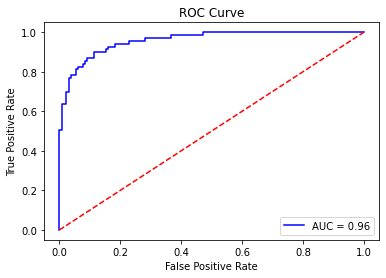

In [67]:
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_score)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = threshold[optimal_idx]

In [70]:
optimal_threshold

0.44302326482927595

In [71]:
predicted_classes = np.where(predictions>optimal_threshold,1,0)

In [72]:
accuracy_score(ytest,predicted_classes)

0.885

In [73]:
confmat = confusion_matrix(ytest, predicted_classes)
confmat = pd.DataFrame(confmat, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
confmat

,Predicted 0,Predicted 1
Actual 0,116,15
Actual 1,8,61


In [74]:
print(classification_report(ytest, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       131
           1       0.80      0.88      0.84        69

    accuracy                           0.89       200
   macro avg       0.87      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



In [130]:
mreview = pd.read_table('movie_reviews.tsv',sep='\t')

In [131]:
mreview.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [79]:
mreview['review'][20000]

'I just watched it. A couple of laughs, but nothing to write home about. Jason Lee looked like he was having fun. The (long) DVD gag reel consists almost solely of him having fits of uncontrollable laughter. Selma Blair seemed to be punching a time clock, but then again, her character was supposed to be a stick in the mud, so \\well done\\" I guess? Jim Brolin was surprisingly funny. (Being married to Babs can\'t be a picnic.) The soundtrack was hip, and eclectic. Larry Miller, who played Julia Stiles father (hilariously), in 10 Things I Hate About You is funny here as well. He\'s great, but the best aspect of this movie was the casting of Julia Stiles. I could spend two hours watching her fold laundry, and I feel like I just did."'

In [78]:
mreview.shape

(25000, 3)

In [80]:
mreview.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [81]:
mreview['sentiment'].describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

In [132]:
mreview.drop(['id'],axis=1,inplace=True)

In [133]:
mreview.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [ ]:
#Convert [text]-->[predictor_matrix]

#Term-Document Matrix

In [89]:
demo_text = ['This is sentence one','This is sentence two','This is very very long sentence three']
demo_text

['This is sentence one',
 'This is sentence two',
 'This is very very long sentence three']

In [92]:
cv = text.CountVectorizer()

In [93]:
count_matrix = cv.fit_transform(demo_text)

In [94]:
cv.get_feature_names()

['is', 'long', 'one', 'sentence', 'this', 'three', 'two', 'very']

In [96]:
count_matrix.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 2]], dtype=int64)

In [97]:
pd.DataFrame(count_matrix.toarray(), columns=cv.get_feature_names())

,is,long,one,sentence,this,three,two,very
0,1,0,1,1,1,0,0,0
1,1,0,0,1,1,0,1,0
2,1,1,0,1,1,1,0,2


In [134]:
cv = text.CountVectorizer(mreview['review'].tolist(),max_features=4000)
X = cv.fit_transform(mreview['review'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [135]:
X.shape

(25000, 4000)

In [136]:
cv.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1930s',
 '1950',
 '1950s',
 '1970',
 '1970s',
 '1980',
 '1980s',
 '1990',
 '1st',
 '20',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '20th',
 '24',
 '25',
 '2nd',
 '30',
 '40',
 '45',
 '50',
 '50s',
 '60',
 '60s',
 '70',
 '70s',
 '80',
 '80s',
 '90',
 '99',
 'abandoned',
 'abc',
 'ability',
 'able',
 'about',
 'above',
 'absence',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'accident',
 'accidentally',
 'accomplished',
 'according',
 'account',
 'accurate',
 'accused',
 'achieve',
 'achieved',
 'achievement',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'actresses',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'adaptation',
 'adapted',
 'add',
 'added',
 'adding',
 'addition',
 'adds',
 'adequate',
 'admire',
 'admit',
 'admittedly',
 'adult',

In [137]:
y = mreview['sentiment']

In [138]:
y

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64

In [139]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=200)

In [107]:
Xtrain.shape

(20000, 4000)

In [108]:
Xtest.shape

(5000, 4000)

In [140]:
ytrain.shape

(20000,)

In [141]:
ytest.shape

(5000,)

In [116]:
clf = linear_model.LogisticRegression(max_iter=500)

In [117]:
mod = clf.fit(Xtrain,ytrain)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
mod.predict_proba(Xtest)

array([[2.65611529e-01, 7.34388471e-01],
       [9.99933058e-01, 6.69422534e-05],
       [9.99999977e-01, 2.25216733e-08],
       ...,
       [5.99755147e-03, 9.94002449e-01],
       [9.99721550e-01, 2.78450155e-04],
       [9.99986659e-01, 1.33414645e-05]])

In [120]:
mod.classes_

array([0, 1], dtype=int64)

In [142]:
np.random.seed(300)
mod = GridSearchCV(clf, param_grid={"penalty":['l2'],'C':np.random.uniform(0,120,2)})
mod.fit(Xtrain,ytrain)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': array([54.13470824, 26.52268101]),
                         'penalty': ['l2']})

In [143]:
mod.best_estimator_

LogisticRegression(C=26.522681005625447, max_iter=500)

In [144]:
mod.best_score_

0.8321500000000001

In [145]:
mod.predict_proba(Xtest)

array([[2.85327543e-02, 9.71467246e-01],
       [9.99999994e-01, 5.74825077e-09],
       [1.00000000e+00, 5.45386565e-19],
       ...,
       [1.23314565e-05, 9.99987669e-01],
       [9.99999953e-01, 4.66697564e-08],
       [1.00000000e+00, 2.41823544e-12]])

In [146]:
roc_curve(ytest,mod.predict_proba(Xtest)[:,1])

(array([0.00000000e+00, 7.93021412e-04, 7.93021412e-04, ...,
        9.55194290e-01, 9.55194290e-01, 1.00000000e+00]),
 array([0.        , 0.04277643, 0.04600484, ..., 0.99959645, 1.        ,
        1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00325611e-17, 9.20087054e-18, 4.84589677e-50]))

In [147]:
fpr, tpr, threshold = roc_curve(ytest,mod.predict_proba(Xtest)[:,1])

In [148]:
roc_score = roc_auc_score(ytest,mod.predict_proba(Xtest)[:,1])

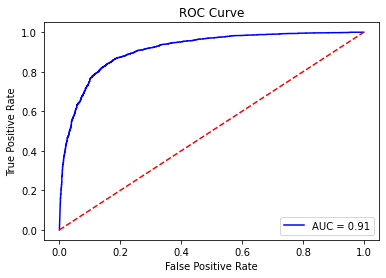

In [149]:
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_score)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [152]:
confusion_matrix(ytest,mod.predict(Xtest))

array([[2123,  399],
       [ 395, 2083]], dtype=int64)

In [153]:
print(classification_report(ytest,mod.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2522
           1       0.84      0.84      0.84      2478

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [154]:
demo_text = ['for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid 80s with a 12-part series called the watchmen .   ',
            "in other words , don't dismiss this film because of its source .",
            'Must watch',
            'if you can get past the whole comic book thing , you might find another stumbling block in from hells directors , albert and allen hughes',
            "'it's a quick , straight shot to the movie's end'",
            'negative',
            "'after watching _a_night_at_the_roxbury_ , you'll be left with exactly the same'"]

In [157]:
mod.predict_proba(cv.transform(demo_text))

array([[0.74310512, 0.25689488],
       [0.91441441, 0.08558559],
       [0.46629849, 0.53370151],
       [0.95058956, 0.04941044],
       [0.28521828, 0.71478172],
       [0.16496222, 0.83503778],
       [0.86125398, 0.13874602]])

In [ ]:
#Multi-Class

In [158]:
pixel_values = pd.read_csv('mnist_x.csv')
image_lables = pd.read_csv('mnist_y.csv',header=None)

In [159]:
pixel_values.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [168]:
pixel_values.shape

(1797, 64)

In [160]:
image_lables.head()

,0
0,0
1,1
2,2
3,3
4,4


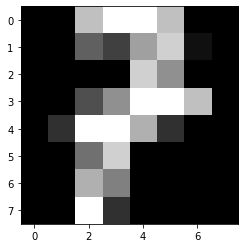

In [173]:
plt.imshow(np.array(pixel_values.iloc[1200]).reshape(8,8),cmap='gray')

In [174]:
image_lables.loc[1200]

0    7
Name: 1200, dtype: int64

In [175]:
X = pixel_values/255.0
y = image_lables[0]

In [176]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=400)

In [177]:
clf = linear_model.LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial')

In [178]:
np.random.seed(400)
mod = GridSearchCV(clf, param_grid={'C':np.random.uniform(0.10,10,10)})
mod.fit(Xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': array([6.7204162 , 2.33738485, 8.60705754, 2.97489986, 1.56733671,
       0.21927904, 7.78392552, 4.10688767, 8.57400804, 5.43397647])})

In [179]:
mod.best_params_

{'C': 8.607057539306727}

In [180]:
mod.score(Xtest,ytest)

0.9416666666666667

In [183]:
Xtest.iloc[0].values.reshape(1,-1)

array([[0.        , 0.        , 0.02352941, 0.05490196, 0.0627451 ,
        0.0627451 , 0.00784314, 0.        , 0.        , 0.01960784,
        0.0627451 , 0.05098039, 0.04313725, 0.0627451 , 0.        ,
        0.        , 0.        , 0.        , 0.02745098, 0.00784314,
        0.05882353, 0.04705882, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02745098, 0.0627451 , 0.05098039,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02352941, 0.05882353, 0.03921569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05882353, 0.03529412, 0.        , 0.        , 0.        ,
        0.01176471, 0.04313725, 0.03137255, 0.0627451 , 0.02352941,
        0.        , 0.        , 0.        , 0.02745098, 0.0627451 ,
        0.0627451 , 0.03137255, 0.        , 0.        ]])

In [184]:
mod.predict_proba(Xtest.iloc[0].values.reshape(1,-1))

array([[0.03375689, 0.01538378, 0.04205071, 0.59599157, 0.00358813,
        0.03927104, 0.00484703, 0.03611584, 0.02636071, 0.2026343 ]])

In [185]:
np.argmax(mod.predict_proba(Xtest.iloc[0].values.reshape(1,-1)))

3

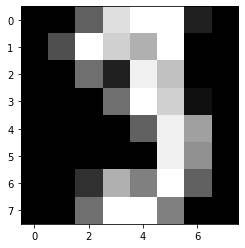

In [186]:
plt.imshow(np.array(Xtest.iloc[0]).reshape(8,8),cmap='gray')

In [188]:
ytest.iloc[0]

3

In [ ]:
#Case-Study

In [319]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [191]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [320]:
data['Attrition'] = data['Attrition'].map(lambda x:1 if x=='Yes' else 0) 

In [195]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [321]:
data = pd.get_dummies(data, columns=['BusinessTravel','Department','EducationField','Gender',\
                                    'JobRole','MaritalStatus','OverTime'])

In [301]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female

In [322]:
data.drop(['Over18','Gender_Male','OverTime_No','EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [200]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,class_Manager,class_Manufacturing Director,class_Research Director,class_Research Scientist,class_Sales Executive,class_Sales Representative,class_Divorced,class_Married,class_Single,class_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,1,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,0,0,1,0,0


In [323]:
data.shape

(1470, 50)

In [324]:
X = data.drop('Attrition',axis=1)
y = data['Attrition']

In [325]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [326]:
Xtrain = sm.add_constant(Xtrain)
Xtest = sm.add_constant(Xtest)

In [327]:
model = sm.GLM(ytrain,Xtrain,family=sm.families.Binomial()).fit()

C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [270]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Generalized linear model
===========================================================================================
Model:                        GLM                       AIC:                     783.8193  
Link Function:                logit                     BIC:                     -7297.1384
Dependent Variable:           Attrition                 Log-Likelihood:          -345.91   
Date:                         2022-02-16 17:49          LL-Null:                 -534.66   
No. Observations:             1176                      Deviance:                691.82    
Df Model:                     45                        Pearson chi2:            2.03e+03  
Df Residuals:                 1130                      Scale:                   1.0000    
Method:                       IRLS                                                         
-------------------------------------------------------------------------------------------
                                   Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------------------
Age                                -0.0364     0.0156 -2.3366 0.0195     -0.0669    -0.0059
DailyRate                          -0.0005     0.0003 -1.9509 0.0511     -0.0010     0.0000
DistanceFromHome                    0.0522     0.0123  4.2536 0.0000      0.0281     0.0762
Education                          -0.0072     0.0987 -0.0734 0.9415     -0.2006     0.1861
EmployeeCount                       0.0001     0.4492  0.0003 0.9998     -0.8803     0.8805
EmployeeNumber                     -0.0002     0.0002 -1.0548 0.2915     -0.0005     0.0002
EnvironmentSatisfaction            -0.5211     0.0928 -5.6139 0.0000     -0.7031    -0.3392
HourlyRate                          0.0004     0.0049  0.0862 0.9313     -0.0091     0.0099
JobInvolvement                     -0.6612     0.1367 -4.8376 0.0000     -0.9291    -0.3933
JobLevel                           -0.2184     0.3692 -0.5916 0.5541     -0.9421     0.5052
JobSatisfaction                    -0.4258     0.0905 -4.7049 0.0000     -0.6031    -0.2484
MonthlyIncome                       0.0000     0.0001  0.4432 0.6576     -0.0001     0.0002
MonthlyRate                         0.0000     0.0000  0.7296 0.4656     -0.0000     0.0000
NumCompaniesWorked                  0.2026     0.0434  4.6690 0.0000      0.1175     0.2876
PercentSalaryHike                  -0.0276     0.0447 -0.6177 0.5368     -0.1152     0.0600
PerformanceRating                   0.2022     0.4473  0.4520 0.6513     -0.6745     1.0789
RelationshipSatisfaction           -0.2987     0.0917 -3.2562 0.0011     -0.4785    -0.1189
StandardHours                       0.0093    35.9343  0.0003 0.9998    -70.4206    70.4393
StockOptionLevel                   -0.1219     0.1801 -0.6769 0.4985     -0.4749     0.2311
TotalWorkingYears                  -0.0506     0.0332 -1.5276 0.1266     -0.1156     0.0143
TrainingTimesLastYear              -0.1677     0.0809 -2.0735 0.0381     -0.3262    -0.0092
WorkLifeBalance                    -0.3949     0.1355 -2.9151 0.0036     -0.6603    -0.1294
YearsAtCompany                      0.0942     0.0431  2.1877 0.0287      0.0098     0.1786
YearsInCurrentRole                 -0.1436     0.0499 -2.8756 0.0040     -0.2414    -0.0457
YearsSinceLastPromotion             0.1819     0.0460  3.9552 0.0001      0.0918     0.2721
YearsWithCurrManager               -0.1235     0.0511 -2.4191 0.0156     -0.2236    -0.0234
BusinessTravel_Non-Travel          -1.0732     0.3169 -3.3868 0.0007     -1.6942    -0.4521
BusinessTravel_Travel_Frequently    0.9441     0.2476  3.8135 0.0001      0.4589     1.4293
BusinessTravel_Travel_Rarely        0.1292     0.2250  0.5742 0.5659     -0.3118     0.5702
Department_Human Resources        -13.5575  8627.4489 -0.0016 0.9987 -16923.0466 16895.9315
Department_Research & De

In [260]:
Xtrain.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Healthcare 

In [271]:
model.pvalues

Age                                  1.945919e-02
DailyRate                            5.106457e-02
DistanceFromHome                     2.103683e-05
Education                            9.415195e-01
EmployeeCount                        9.997925e-01
EmployeeNumber                       2.914950e-01
EnvironmentSatisfaction              1.978504e-08
HourlyRate                           9.312712e-01
JobInvolvement                       1.314420e-06
JobLevel                             5.541368e-01
JobSatisfaction                      2.539906e-06
MonthlyIncome                        6.575900e-01
MonthlyRate                          4.656155e-01
NumCompaniesWorked                   3.027321e-06
PercentSalaryHike                    5.367730e-01
PerformanceRating                    6.512913e-01
RelationshipSatisfaction             1.129176e-03
StandardHours                        9.997925e-01
StockOptionLevel                     4.984565e-01
TotalWorkingYears                    1.266209e-01


In [272]:
max(model.pvalues)

0.999792539795057

In [263]:
zip(model.pvalues, Xtrain.columns)

In [280]:
while max(model.pvalues)>0.05:
    for a,b in zip(model.pvalues, Xtrain.columns):
        if a>0.05:
            Xtrain = Xtrain.drop(b,axis=1)
            Xtest = Xtest.drop(b,axis=1)
            model = sm.GLM(ytrain,Xtrain,family=sm.families.Binomial()).fit()
            break

In [281]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Generalized linear model
================================================================================
Model:                     GLM                   AIC:                 772.7569  
Link Function:             logit                 BIC:                 -7424.8080
Dependent Variable:        Attrition             Log-Likelihood:      -363.38   
Date:                      2022-02-16 17:55      LL-Null:             -534.66   
No. Observations:          1176                  Deviance:            726.76    
Df Model:                  22                    Pearson chi2:        2.20e+03  
Df Residuals:              1153                  Scale:               1.0000    
Method:                    IRLS                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Age                              -0.0506   0.0129 -3.9263 0.0001 -0.0759 -0.0254
DistanceFromHome                  0.0476   0.0116  4.0909 0.0000  0.0248  0.0705
EnvironmentSatisfaction          -0.4584   0.0879 -5.2176 0.0000 -0.6306 -0.2862
JobInvolvement                   -0.6820   0.1311 -5.2027 0.0000 -0.9389 -0.4251
JobSatisfaction                  -0.4059   0.0867 -4.6799 0.0000 -0.5759 -0.2359
NumCompaniesWorked                0.1643   0.0399  4.1162 0.0000  0.0861  0.2426
RelationshipSatisfaction         -0.2479   0.0875 -2.8340 0.0046 -0.4194 -0.0765
TrainingTimesLastYear            -0.1742   0.0781 -2.2289 0.0258 -0.3273 -0.0210
WorkLifeBalance                  -0.3811   0.1305 -2.9203 0.0035 -0.6369 -0.1253
YearsInCurrentRole               -0.1455   0.0383 -3.7961 0.0001 -0.2206 -0.0704
YearsSinceLastPromotion           0.1683   0.0388  4.3349 0.0000  0.0922  0.2444
BusinessTravel_Travel_Frequently  1.9027   0.4344  4.3803 0.0000  1.0513  2.7540
BusinessTravel_Travel_Rarely      1.1357   0.4012  2.8307 0.0046  0.3494  1.9220
EducationField_Technical Degree   0.9309   0.3104  2.9990 0.0027  0.3225  1.5393
JobRole_Human Resources           1.8525   0.5077  3.6489 0.0003  0.8574  2.8475
JobRole_Laboratory Technician     1.6712   0.3258  5.1303 0.0000  1.0328  2.3097
JobRole_Research Scientist        0.6747   0.3354  2.0115 0.0443  0.0173  1.3321
JobRole_Sales Executive           1.2467   0.3155  3.9521 0.0001  0.6284  1.8650
JobRole_Sales Representative      2.3437   0.4219  5.5556 0.0000  1.5169  3.1706
MaritalStatus_Divorced            1.8744   0.9491  1.9749 0.0483  0.0142  3.7346
MaritalStatus_Married             2.3021   0.9329  2.4676 0.0136  0.4736  4.1306
MaritalStatus_Single              3.2500   0.9353  3.4747 0.0005  1.4168  5.0832
OverTime_Yes                      1.7875   0.2059  8.6799 0.0000  1.3839  2.1912
================================================================================

"""

In [328]:
i = 1
while max(model.pvalues) > 0.05:
    col_remove = model.pvalues[model.pvalues == max(model.pvalues)].index[0]
    print(i, ") ", col_remove, ": ", max(model.pvalues))
    i+=1
    Xtrain.drop(col_remove,axis=1,inplace=True)
    Xtest.drop(col_remove,axis=1,inplace=True)
    model = sm.GLM(ytrain,Xtrain,family=sm.families.Binomial()).fit()

In [329]:
model_final = sm.GLM(ytrain,Xtrain,family=sm.families.Binomial()).fit()
model_final.summary()

C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                            GLM   Df Residuals:                     1131
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 16 Feb 2022   Deviance:                       23118.
Time:                        18:12:32   Pearson chi2:                 1.13e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1.805e+15   1.33e+07   1.36e+08      0.000     1.8e+15     1.8e+15
Age                                -2.75e+13   3.15e+05  -8.73e+07      0.000   -2.75e+13   -2.75e+13
DailyRate                         -1.064e+11   4992.944  -2.13e+07      0.000   -1.06e+11   -1.06e+11
DistanceFromHome                   2.973e+13   2.49e+05    1.2e+08      0.000    2.97e+13    2.97e+13
Education                          2.035e+13   1.98e+06   1.03e+07      0.000    2.04e+13    2.04e+13
EnvironmentSatisfaction           -3.281e+14   1.82e+06   -1.8e+08      0.000   -3.28e+14   -3.28e+14
HourlyRate                        -1.409e+12   9.81e+04  -1.44e+07      0.000   -1.41e+12   -1.41e+12
JobInvolvement                    -4.781e+14   2.79e+06  -1.71e+08      0.000   -4.78e+14   -4.78e+14
JobLevel                          -2.161e+14   6.86e+06  -3.15e+07      0.000   -2.16e+14   -2.16e+14
JobSatisfaction                   -2.775e+14   1.79e+06  -1.55e+08      0.000   -2.77e+14   -2.77e+14
MonthlyIncome                      5.265e+10   1821.412   2.89e+07      0.000    5.26e+10    5.26e+10
MonthlyRate                        6.672e+09    277.777    2.4e+07      0.000    6.67e+09    6.67e+09
NumCompaniesWorked                 1.094e+14   8.83e+05   1.24e+08      0.000    1.09e+14    1.09e+14
PercentSalaryHike                  6.231e+12   8.66e+05    7.2e+06      0.000    6.23e+12    6.23e+12
PerformanceRating                 -1.584e+14    8.7e+06  -1.82e+07      0.000   -1.58e+14   -1.58e+14
RelationshipSatisfaction          -1.642e+14   1.82e+06  -9.03e+07      0.000   -1.64e+14   -1.64e+14
StockOptionLevel                   1.426e+13   3.19e+06   4.47e+06      0.000    1.43e+13    1.43e+13
TotalWorkingYears                 -3.335e+13   5.71e+05  -5.84e+07      0.000   -3.33e+13   -3.33e+13
TrainingTimesLastYear             -1.033e+14   1.56e+06  -6.62e+07      0.000   -1.03e+14   -1.03e+14
WorkLifeBalance                   -2.142e+14   2.78e+06  -7.71e+07      0.000   -2.14e+14   -2.14e+14
YearsAtCompany                     5.494e+13   6.86e+05      8e+07      0.000    5.49e+13    5.49e+13
YearsInCurrentRole                -5.683e+13   8.98e+05  -6.33e+07      0.000   -5.68e+13   -5.68e+13
YearsSinceLastPromotion            6.048e+13   7.93e+05   7.63e+07      0.000    6.05e+13    6.05e+13
YearsWithCurrManager              -7.032e+13   9.29e+05  -7.57e+07      0.000   -7.03e+13   -7.03e+13
BusinessTravel_Non-Travel          9.021e+12   6.42e+06   1.41e+06      0.000    9.02e+12    9.02e+12
BusinessTravel_Travel_Frequently   1.177e+15   5.83e+06   2.02e+08      0.000    1.18e+15    1.18e+15
BusinessTravel_Travel_Rarely       6.183e+14   5.18e+06   1.19e+08      0.000    6.18e+14    6.18e+14
Department_Human Resour

In [330]:
predictions = model_final.predict(Xtest)

C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [331]:
threshold=0.5
predicted_classes = np.where(predictions>threshold,1,0)

In [332]:
accuracy_score(ytest,predicted_classes)

0.7346938775510204

In [333]:
cm = confusion_matrix(ytest,predicted_classes)
cm

array([[192,  64],
       [ 14,  24]], dtype=int64)

In [334]:
confmat = pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

In [335]:
confmat

,Predicted 0,Predicted 1
Actual 0,192,64
Actual 1,14,24


In [336]:
fpr,tpr,threshold = roc_curve(ytest,predictions)

In [337]:
roc_score = roc_auc_score(ytest,predictions)

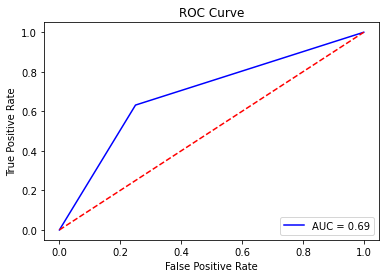

In [338]:
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % roc_score)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()